Iteration:      1,   Func. Count:      5,   Neg. LLF: 30985.345216865775
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12756.802407538278
Iteration:      3,   Func. Count:     21,   Neg. LLF: 8009.570035504191
Iteration:      4,   Func. Count:     26,   Neg. LLF: 8084.002653844407
Iteration:      5,   Func. Count:     31,   Neg. LLF: 7803.7106430088115
Iteration:      6,   Func. Count:     35,   Neg. LLF: 7803.646899794943
Iteration:      7,   Func. Count:     39,   Neg. LLF: 7803.642810191368
Iteration:      8,   Func. Count:     43,   Neg. LLF: 7803.642680181065
Iteration:      9,   Func. Count:     46,   Neg. LLF: 7803.642680180915
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7803.642680181065
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:             

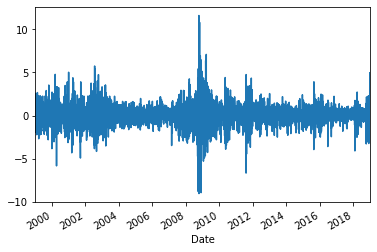

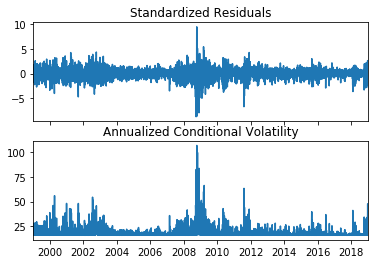

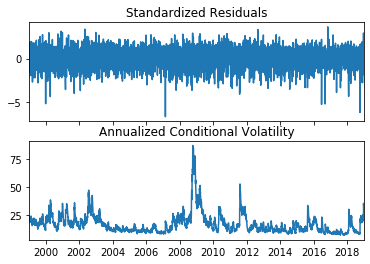

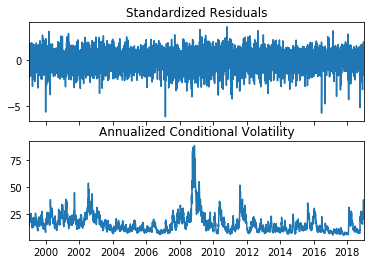

In [17]:
import matplotlib.pyplot as plt
import datetime as dt  # optional
import arch.data.sp500

st = dt.datetime(1988, 1, 1) # setting the date. Optional line.
en = dt.datetime(2018, 1, 1) # setting the date. Optional line.

data = arch.data.sp500.load()  # data from the library 

market = data["Adj Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

#xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# Estimating a GARCH and ARCH models
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs

# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs
